In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from neurodsp import sim
from neurodsp.spectral import compute_spectrum
from galaxybrain.data_utils import load_mouse_data, return_pops, spike_dict
from galaxybrain.plot_utils import rc_style, noticks, pltlabel
from galaxybrain import ramsey

rc_style(font_size=14)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mice_regions = spike_dict([0]) #just grabbing first mouse

Mouse 1
Grabbing Spikes...
Binning Spikes...
[('CP', 176), ('FrMoCtx', 78), ('HPF', 265), ('LS', 122), ('MB', 127), ('SC', 42), ('SomMoCtx', 91), ('TH', 227), ('V1', 334)] Total: 1462
Mouse 2
Grabbing Spikes...
Binning Spikes...
[('FrCtx', 31), ('FrMoCtx', 647), ('HPF', 333), ('LS', 133), ('MB', 40), ('RSP', 112), ('SC', 98), ('SSCtx', 50), ('SomMoCtx', 220), ('TH', 638), ('UNK', 11), ('V1', 251), ('V2', 124)] Total: 2688
Mouse 3
Grabbing Spikes...
Binning Spikes...
[('CP', 134), ('FrMoCtx', 86), ('HPF', 155), ('LH', 4), ('LS', 4), ('RSP', 10), ('SomMoCtx', 10), ('TH', 1878), ('UNK', 15)] Total: 2296


# Ramsey pipeline figures

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


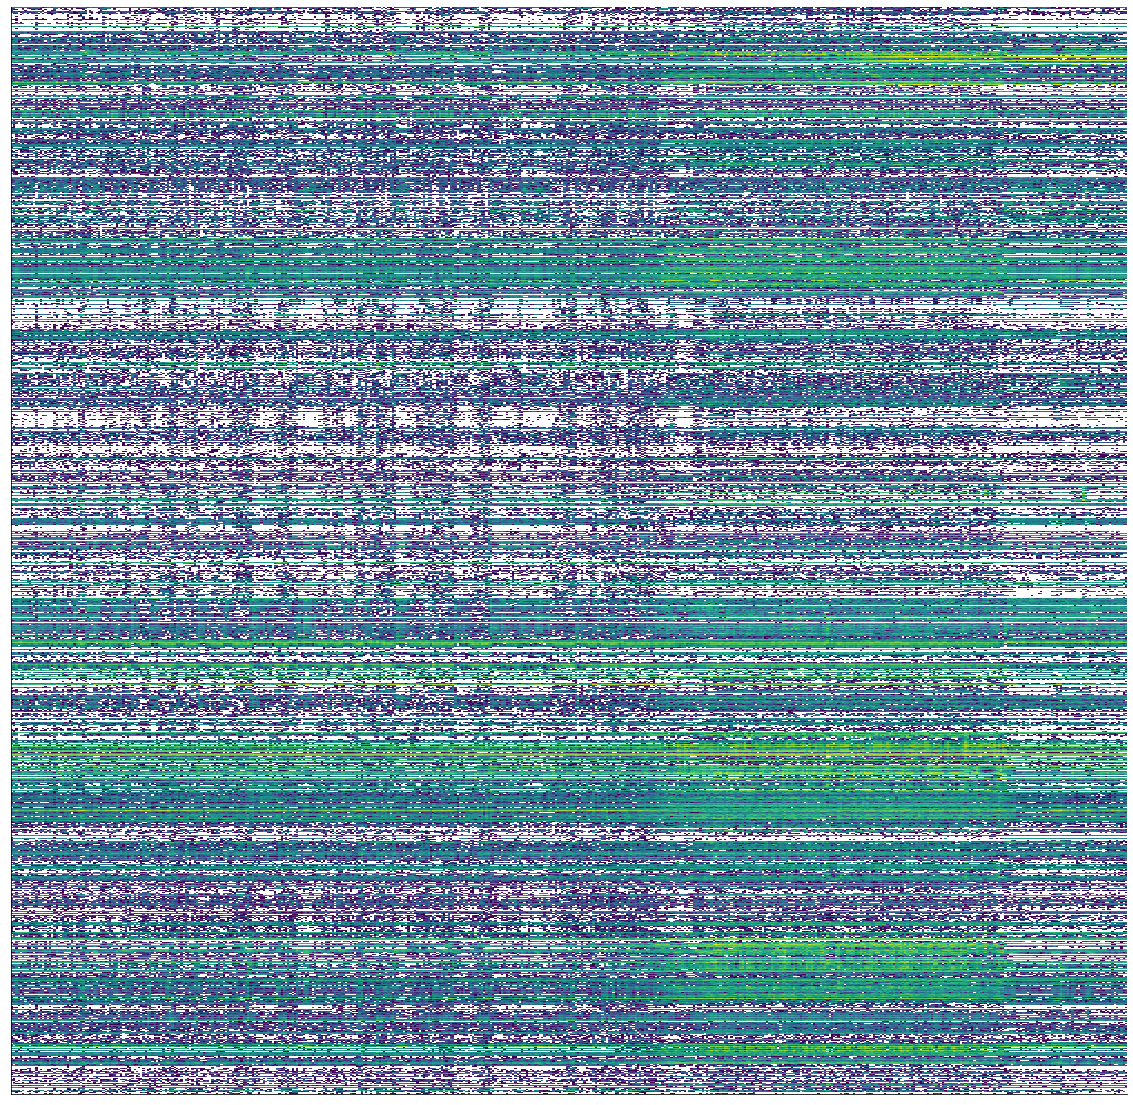

In [167]:
burn_in = 400
krebs_sample = np.log10(np.array(mice_regions['krebs'][0][0]))[burn_in:-burn_in,350:].T
plt.figure(figsize=(20,20))
plt.imshow(krebs_sample, aspect='auto')
noticks()
plt.savefig('../fig/diagram/raster.svg', bbox_inches='tight')

# fill = np.ones((20,20))
# plt.imshow(fill)

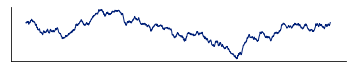

In [68]:
dummy_pop_vec = sim.sim_powerlaw(n_seconds=4, fs=500, exponent=-2.25)
plt.figure(figsize=(6,1))
plt.plot(dummy_pop_vec, lw=1, color='#002078')
noticks()
plt.savefig('../fig/diagram/sum.svg', bbox_inches='tight')

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


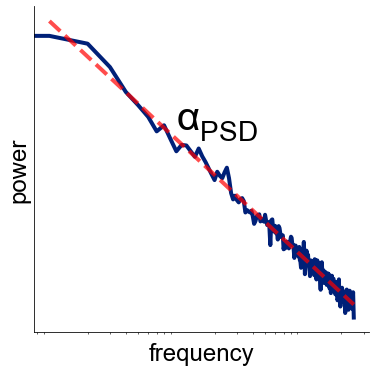

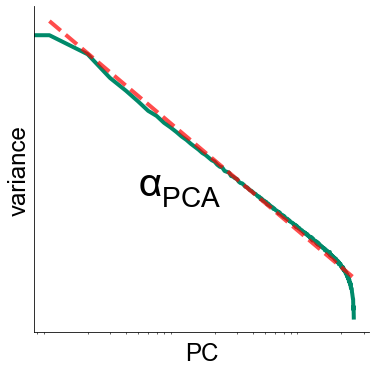

In [11]:
def dummy_spectrum(exp, dim, clr, xylab, anno_xy):
    """Plot simulated spectrum and aperiodic fit"""
    FS = 500
    model = lambda x, offset: (10**offset)*x**-exp # to plot power law
    dummy_pop_vec = sim.sim_powerlaw(n_seconds=4, fs=FS, exponent=exp)
    plt.figure(figsize=([6,6]))
    ## plot spectrum
    freqs, psd = compute_spectrum(dummy_pop_vec, FS, nperseg=FS, noverlap=FS/2)
    plt.loglog(psd.T, lw=4, color=clr)
    
    ## plot aperiodic fit
    exp, er, of = ramsey.fooofy(freqs, psd, x_range=None, group=False)
    plt.loglog(freqs, model(freqs, of),color='red',alpha=0.7,lw=4, ls='--')
    
    pltlabel(None, *xylab, size=24)
    plt.annotate(r'$\alpha_{%s}$'%dim, anno_xy, fontsize=40)
    noticks()
    plt.savefig(f'../fig/diagram/{dim}_fit.svg', bbox_inches='tight')

dummy_spectrum(-3, 'PSD', '#002078', ['frequency', 'power'], (10, 10e-4))
dummy_spectrum(-6, 'PCA', '#008a6a', ['PC', 'variance'], (5, 10e-12))

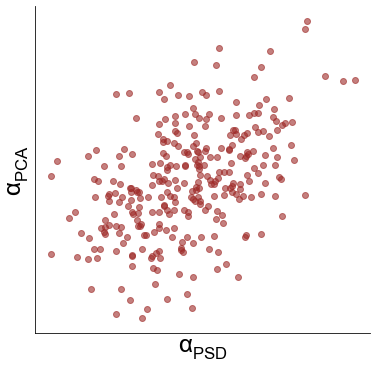

In [17]:
points = np.random.multivariate_normal([0,0], ([5,2.5], [2.5,6]), 300).T
plt.figure(figsize=(6,6))
plt.scatter(points[0],points[1], marker='o', color='#9e2a28', alpha=0.6)
noticks()
pltlabel(None, r'$\alpha_{PSD}$', r'$\alpha_{PCA}$', 24)
plt.savefig('../fig/diagram/exp_scatter.svg', bbox_inches='tight')

# Conference figures

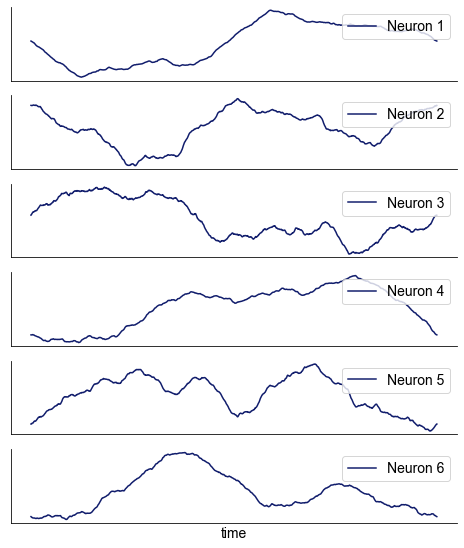

In [191]:
plt.figure(figsize=(8,16))

for i in range(6):
    signal = sim.sim_powerlaw(n_seconds=100, fs=500, exponent=-3)
    plt.subplot(10,1,i+1)
    plt.plot(signal, label = 'Neuron {}'.format(i+1))
    plt.legend(loc = 'upper right')
    plt.xticks([])
    plt.yticks([])

plt.xlabel('time')
plt.show()

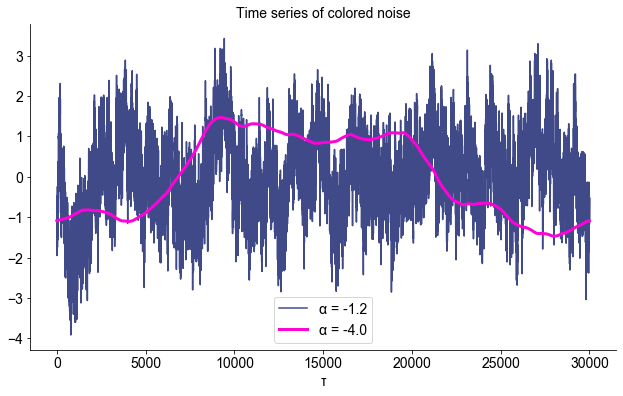

In [195]:
save = 1
f = plt.figure(figsize = (10.5,6))
plt.plot(signals['-1.2'][0].T, color = '#111d6c', label = '\u03B1 = -1.2', alpha = 0.8)
plt.plot(signals['-4.0'][0].T, color = '#fc03d7', lw = 3, label = '\u03B1 = -4.0')
plt.legend(fontsize = 14)
plt.xlabel('\u03C4')
plt.title('Time series of colored noise', fontsize = 14)
plt.show()

if save:
    f.savefig('../../conferences/sampleseries', dpi = 300)